In [44]:
import sys   
import xarray as xr
import numpy as np

# # Récupération du xp_name 
#path_ncfile = sys.argv[1]
#/Odyssey/private/t22picar/data/sst_L4/SST_L4_OSTIA_2010-01-01-2019-01-01_4th.nc
path_ncfile = "/Odyssey/private/t22picar/data/sst_L4/SST_L4_OSTIA_2010-01-01-2019-01-01_4th.nc" #sys.argv[1]
ds = xr.open_dataset(path_ncfile)


In [45]:
# Get the list of variable names
variable_names = list(ds.variables.keys())
variable_names.remove("time")

for var in variable_names:
    ds[var] = ds[var].astype(np.float32)

ds.to_netcdf(path_ncfile[:-3]+"_float32.nc")

In [46]:
sys.path.append("../../tools")
from plot_tools import plot_uv_map

In [47]:
ds

<xarray.Dataset> Size: 13GB
Dimensions:  (time: 3287, lat: 680, lon: 1440)
Coordinates:
  * time     (time) datetime64[ns] 26kB 2010-01-01 2010-01-02 ... 2018-12-31
  * lat      (lat) float32 3kB -80.0 -79.75 -79.5 -79.25 ... 89.5 89.75 90.0
  * lon      (lon) float32 6kB -180.0 -179.7 -179.5 -179.2 ... 179.4 179.7 179.9
Data variables:
    thetao   (time, lat, lon) float32 13GB nan nan nan nan ... nan nan nan nan
Attributes:
    title:                     Global SST & Sea Ice Analysis, L4 OSTIA, 0.05 ...
    institution:               UKMO
    Conventions:               CF-1.4, ACDD-1.3
    source:                    AMSR2-REMSS-L2P-v2.0, AMSRE-REMSS-L2P-v2.0, GO...
    comment:                   WARNING Some applications are unable to proper...
    references:                Donlon, C.J., Martin, M., Stark, J.D., Roberts...
    history:                   Created from sst.nc; obs_anal.nc; seaice.nc
    copernicusmarine_version:  2.0.1

In [ ]:
path_ncfile = path_ncfile[:-3]+"_float32.nc" #sys.argv[1]

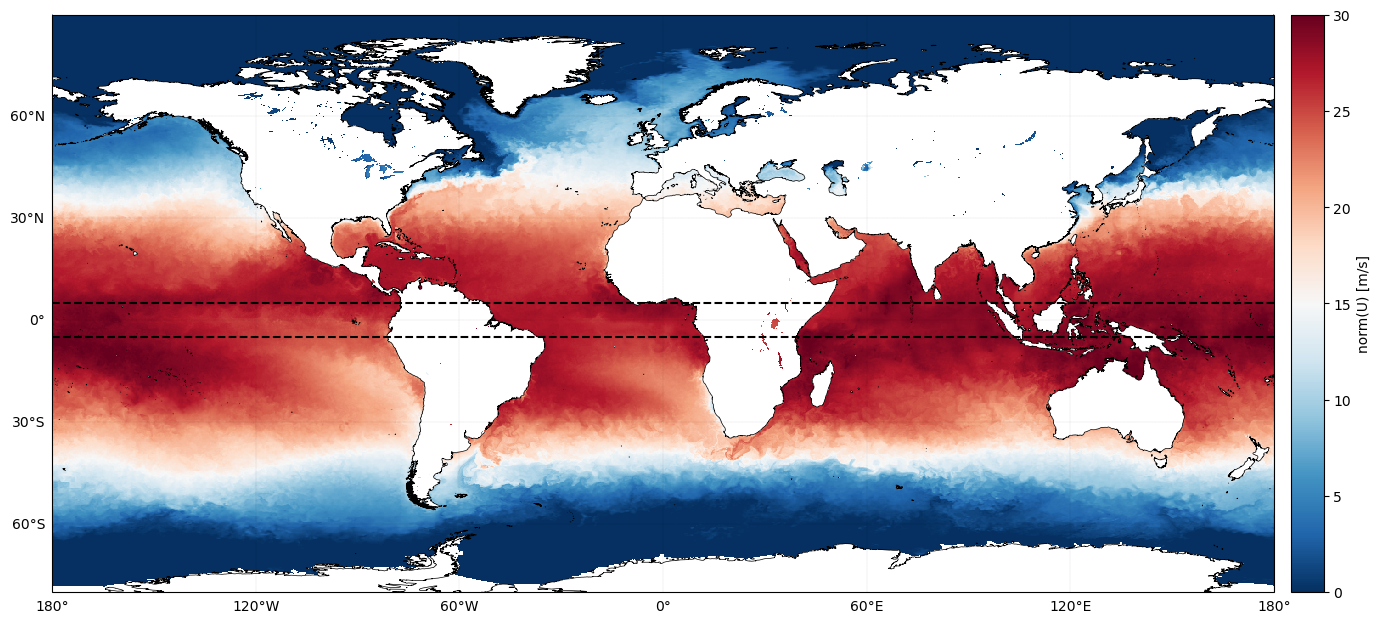

In [50]:
# Check
#path_ncfile = "/Odyssey/private/t22picar/data/era5/era5_2010-2018_dailymean_4th.nc" #sys.argv[1]

ds = xr.open_dataset(path_ncfile)
plot_uv_map(ds.thetao[0]-273.5,ds.lon,ds.lat,vmin=0,vmax=30)